# 1 Import Libraries and Data

In [1364]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1365]:
cityTemp_path = '/Users/ryumugil/Downloads/Achievement 6 Analysis'
cols_list = ['Region', 'Country', 'State', 'Month', 'Day', 'Year', 'AvgTemperature']
df_cityTemp_clean = pd.read_csv(os.path.join(cityTemp_path, '02 Data', 'Original data', 'city_temperature_cleaned.csv'))
df_cityTemp_clean.head(20)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1.0,1.0,1995.0,64.2
1,Africa,Algeria,NaN,Algiers,1.0,2.0,1995.0,49.4
2,Africa,Algeria,NaN,Algiers,1.0,3.0,1995.0,48.8
3,Africa,Algeria,NaN,Algiers,1.0,4.0,1995.0,46.4
4,Africa,Algeria,NaN,Algiers,1.0,5.0,1995.0,47.9
5,Africa,Algeria,NaN,Algiers,1.0,6.0,1995.0,48.7
6,Africa,Algeria,NaN,Algiers,1.0,7.0,1995.0,48.9
7,Africa,Algeria,NaN,Algiers,1.0,8.0,1995.0,49.1
8,Africa,Algeria,NaN,Algiers,1.0,9.0,1995.0,49.0
9,Africa,Algeria,NaN,Algiers,1.0,10.0,1995.0,51.9


# 2. Data Cleaning

In [1367]:
df_cityTemp_clean.columns

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

In [1368]:
df_cityTemp_clean.shape

(1000000, 8)

Missing values

In [1370]:
# Check for missing values

df_cityTemp_clean.isnull().sum()

Region                  2
Country                 1
State             1000000
City                    1
Month                   1
Day                     1
Year                    1
AvgTemperature          1
dtype: int64

Duplicate check

In [1372]:
dups = df_cityTemp_clean.duplicated()

In [1373]:
dups.shape # No dups

(1000000,)

Extreme values checks

/var/folders/qx/qj_9c1q9595cg344qrssq5qr0000gq/T/ipykernel_13512/314420024.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cityTemp_clean['AvgTemperature'], bins=25) # Shows extreme values


<Axes: xlabel='AvgTemperature', ylabel='Density'>

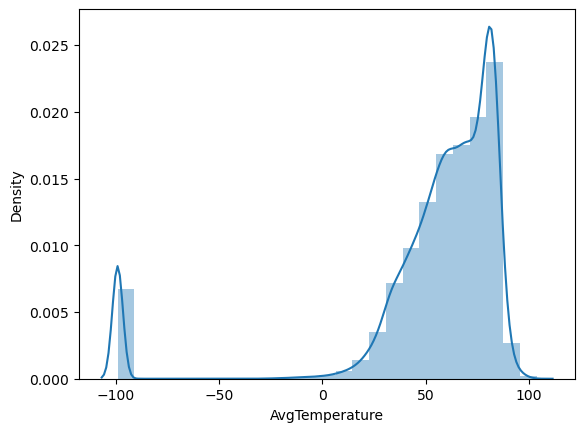

In [1375]:
sns.distplot(df_cityTemp_clean['AvgTemperature'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [1376]:
df_cityTemp_clean['AvgTemperature'].mean() # Check the mean

54.20685310685309

In [1377]:
df_cityTemp_clean['AvgTemperature'].median() # Check the median

64.1

In [1378]:
df_cityTemp_clean['AvgTemperature'].max() # Check the max

103.7

In [1379]:
df_cityTemp_clean.sort_values(by='Year', inplace=True)
df_cityTemp_clean=df_cityTemp_clean[df_cityTemp_clean['Year'] >= 1995]
df_cityTemp_clean=df_cityTemp_clean[df_cityTemp_clean['Year'] <= 2020]

This suggests two distinct clusters of temperature data, with the majority of values falling in the positive range, indicating a predominance of warmer temperatures. Some extreme values on the lower end may need further investigation or removal.

# 3. Data prep for regression analysis

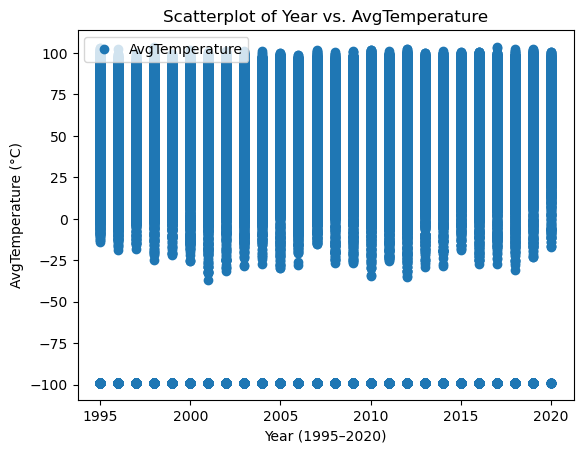

In [1382]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_cityTemp_clean.plot(x = 'Year', y='AvgTemperature',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Scatterplot of Year vs. AvgTemperature')
plt.xlabel('Year (1995–2020)')
plt.ylabel('AvgTemperature (°C)')
plt.show()

The scatter plot displays data points are represented as vertical blue bars, indicating a range of temperatures for each year, with values fluctuating between approximately -100°C and 100°C. The plot suggests significant variability and potential outliers, but no clear trend is evident due to the wide spread of data points.

In [1383]:
#df_cityTemp_clean = df_cityTemp_clean[].dropna()
df_cityTemp_clean['Year']

27        1995.0
28        1995.0
29        1995.0
30        1995.0
63        1995.0
           ...  
859602    2020.0
859601    2020.0
859600    2020.0
859593    2020.0
859592    2020.0
Name: Year, Length: 999588, dtype: float64

In [1385]:
X = df_cityTemp_clean['Year'].dropna().values.reshape(-1,1)
y = df_cityTemp_clean['AvgTemperature'].dropna().values.reshape(-1,1)

In [1386]:
X

array([[1995.],
       [1995.],
       [1995.],
       ...,
       [2020.],
       [2020.],
       [2020.]])

In [1387]:
y

array([[53.8],
       [54.3],
       [57.4],
       ...,
       [38.6],
       [32.7],
       [38.7]])

In [1388]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [1390]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.


In [1391]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [1392]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [1393]:
X_test

array([[2013.],
       [2007.],
       [2015.],
       ...,
       [2012.],
       [2018.],
       [2016.]])

In [1394]:
y_test

array([[78.9],
       [65.5],
       [81.5],
       ...,
       [59.6],
       [64.7],
       [72.2]])

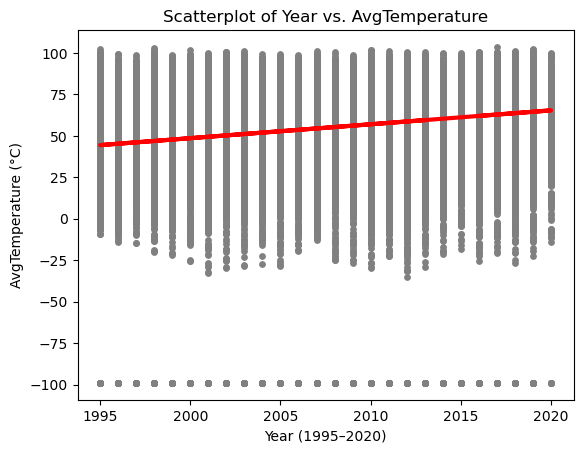

In [1395]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Scatterplot of Year vs. AvgTemperature')
plot_test.xlabel('Year (1995–2020)')
plot_test.ylabel('AvgTemperature (°C)')
plot_test.show()

The red regression line showing the linear trend. The x-axis represents years,and the y-axis shows temperature in Celsius. The regression line indicates a slight upward trend, suggesting a gradual increase in average temperature over time, though the data points show significant variability and clustering around certain years.

In [1425]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [1427]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.83807256]]
Mean squared error:  1618.4791945398053
R2 score:  0.02248973002379573


In [1429]:
y_predicted

array([[59.47527016],
       [54.44683479],
       [61.15141528],
       ...,
       [58.63719759],
       [63.66563297],
       [61.98948784]])

In [1431]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,78.9,59.475270
1,65.5,54.446835
2,81.5,61.151415
3,82.2,51.094545
4,73.5,61.151415
5,26.2,60.313343
6,76.1,53.608762
7,63.8,44.389964
8,87.0,64.503706
9,62.3,49.418399


# 5.Compare how the regression fits the training set

In [1434]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [1436]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [1438]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.83807256]]
Mean squared error:  1608.1178133005487
R2 score:  0.022692732137099547


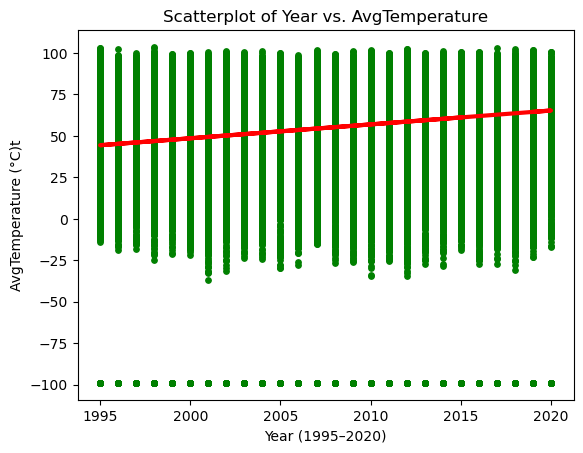

In [1441]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Scatterplot of Year vs. AvgTemperature')
plot_test.xlabel('Year (1995–2020)')
plot_test.ylabel('AvgTemperature (°C)t')
plot_test.show()

# Model Performance on Test Set

The model’s performance on the test set, as shown in the plots, appears moderate. The regression line on the test set plot (red line) shows a slight upward trend in average temperature over time, but the wide scatter of data points (gray bars) indicates low correlation and high variability, suggesting the model captures only a weak linear relationship. The training set plot (red line with green bars) shows a similar trend with less scatter, implying a stronger correlation in the training data. Overall, the model fits the training data better than the test data, indicating potential overfitting or insufficient data complexity, with a correlation likely ranging from weak to moderate (R² possibly below 0.5).

# Reflection on Possible Data Bias

The plots suggest potential data bias, as the temperature data shows extreme variability and clustering (e.g., -100°C to 100°C), which may reflect incomplete or unrepresentative sampling across regions or years. This could skew the regression model, overemphasizing certain periods or locations (e.g., Algiers or New York), leading to biased predictions. Addressing bias by ensuring balanced data collection across diverse geographies and timeframes could improve model reliability.